In [102]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
import string
import re

import warnings
warnings.filterwarnings('ignore')

In [103]:
#Lets load the train dataset
df=pd.read_csv("malignant_comments_train.csv")
test_df=pd.read_csv("malignant_comments_test.csv")

In [104]:
pd.set_option('display.max_colwidth', None) # display the full data of a column
df.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the tools well. · talk """,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,"Your vandalism to the Matt Shirvington article has been reverted. Please don't do it again, or you will be banned.",0,0,0,0,0,0
8,00037261f536c51d,"Sorry if the word 'nonsense' was offensive to you. Anyway, I'm not intending to write anything in the article(wow they would jump on me for vandalism), I'm merely requesting that it be more encyclopedic so one can use it for school as a reference. I have been to the selective breeding page but it's almost a stub. It points to 'animal breeding' which is a short messy article that gives you no info. There must be someone around with expertise in eugenics? 93.161.107.169",0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contrary to those of DuLithgow,0,0,0,0,0,0


In [105]:
df.tail()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
159566,ffe987279560d7ff,""":::::And for the second time of asking, when your view completely contradicts the coverage in reliable sources, why should anyone care what you feel? You can't even give a consistent argument - is the opening only supposed to mention significant aspects, or the """"most significant"""" ones? \n\n""",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is a horrible thing you put on my talk page. 128.61.19.93,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for prostitution ring. - Crunch Captain.",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand. I came here and my idea was bad right away. What kind of community goes """"you have bad ideas"""" go away, instead of helping rewrite them. """,0,0,0,0,0,0


    The Dataset contains 8 fields, id is the unique identification number for each of the comment.
    comment_text are the comments extracted from various social media platforms.
    malignant, highly_malignant, rude, threat, abuse and loathe are the Binary labels can be either 0 or 1, 0 denotes No and 1 denotes Yes.
    From the above table, There are various comments which have multiple labels.


In [106]:
df['comment_text'].isnull().sum() #There is no null values in the comment_text

0

In [107]:
df.shape #159571 samples of data with 8 attributes

(159571, 8)

In [108]:
test_df.shape #Test data shape

(153164, 2)

In [109]:
#Lets find the counts of each label
df['malignant'].value_counts(), df['highly_malignant'].value_counts(), df['rude'].value_counts(), df['threat'].value_counts(),df['abuse'].value_counts(),df['loathe'].value_counts()

(0    144277
 1     15294
 Name: malignant, dtype: int64,
 0    157976
 1      1595
 Name: highly_malignant, dtype: int64,
 0    151122
 1      8449
 Name: rude, dtype: int64,
 0    159093
 1       478
 Name: threat, dtype: int64,
 0    151694
 1      7877
 Name: abuse, dtype: int64,
 0    158166
 1      1405
 Name: loathe, dtype: int64)

###### Preprocessing:

In [110]:
#Lets find out the lenth og each comment_text in a new column comment_len
df['comment_len']=df['comment_text'].str.len()
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment_len
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0,264
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember what page that's on?",0,0,0,0,0,0,67


In [111]:
df.describe(include='object')

,id,comment_text
count,159571,159571
unique,159571,159571
top,93f39f40f0b48eef,"Where to put full versions of abbreviated citations \n\nRe this edit, which I mostly reverted. I've run into similar problems elsewhere, where a few works are cited many times, and it's useful to collect the the full citations into a section, and to have the footnotes cite these works in abbreviated form. In Daylight saving time I addressed the problem by moving those books into the Further reading section, which isn't exactly appropriate, as Further reading is supposed to be for books that weren't used as sources; I attempted to work around the problem by having the first footnote mention the existence of the full citations in the Further reading section. In Philitas of Cos I addressed it by renaming the section that is ordinarily called References to Notes and having a new References section containing the list of full citations; but it's a bit weird and non-uniform to have the section title move to the newly-added section when you need the new section. I vaguely recall seeing an list-of-full-citations section called Bibliography in some other article but that's not appropriate either, as the MOS says that Bibliography is for works written by the subject of the article. I don't know of any useful guideline in Wikipedia in this problematic area. The approach currently taken in Tourette syndrome #References isn't clearly wrong, and is arguably better than what's in Daylight saving time or in Philitas of Cos, not only because it doesn't abuse Further reading and References as titles, but also because it puts the most important references first."
freq,1,1


In [112]:
#Lets remove the column id as it is unique id and does not holds any information.
df.drop(['id'], axis=1, inplace=True)

In [113]:
#Punctuations
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [114]:
df['comment_text'].head()

0                                                                                                                                                                                                                                                                                                                                                                             Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
1                                                                                                                                                                                                                                                                                                                                                                               

In [115]:

#cleaning the text data
def cleaning(comment):
    #Lets convert the comment_text to lower case
    comment=comment.lower()
    # Replace whitespace between terms with a single space
    comment=comment.replace(r'\s+',' ')
    # Remove leading and trailing whitespace
    comment=comment.replace(r'^\s+|\s+?$', '')
    #Now Lets remove the numbers from the data
    comment=re.sub(r'[0-9]+',"", comment)
        #comment=comment.replace(r'\d+(\.\d+)?', 'num')
    #removing the line breaker
    comment=comment.replace('\n', '')
    #Removing the punctuations
    comment=comment.translate(str.maketrans('', '', string.punctuation))

    return comment


In [116]:
# Using word_tokenize to tokenize sentence into words
def tokenized_rev(comment):
    return word_tokenize(comment, "english")

In [117]:
#Filter out stop words
stop_words=stopwords.words('English')
stop_words.append(('its','im', 'hey', 'let', 'ie', 'u', 'ur', 'youll','yo', 'da', 'ja'))
def remove_stopword(comment):
    comment= [w for w in comment if not w in stop_words]
    comments=' '.join(comment)
    return comments

In [118]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [119]:
#Applying cleaning, tokenization and remove_stopwords methods on train data set
df['comment_text']=df['comment_text'].apply(lambda x: cleaning(x))
df['comment_text']=df['comment_text'].apply(lambda x: tokenized_rev(x))
df['comment_text']=df['comment_text'].apply(lambda x: remove_stopword(x))
df['comment_text'].head()

0                                                                                                                                                                                                                        explanationwhy edits made username hardcore metallica fan reverted werent vandalisms closure gas voted new york dolls fac please dont remove template talk page since im retired
1                                                                                                                                                                                                                                                                                                                               daww matches background colour im seemingly stuck thanks talk january utc
2                                                                                                                                                                                                                   

In [120]:
test_df['comment_text'].head()

0    Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,
1                                                                                                                                                                                                                                                                                                                               == From RfC == \n\n The title is fine as it is, IMO.
2                                                                                                                                                                                                                                                             

In [121]:
#Applying cleaning, tokenization and stopword removal methods on test data set
test_df['comment_text']=test_df['comment_text'].apply(lambda x: cleaning(x))
test_df['comment_text']=test_df['comment_text'].apply(lambda x: tokenized_rev(x))
test_df['comment_text']=test_df['comment_text'].apply(lambda x: remove_stopword(x))
test_df['comment_text'].head()

0    yo bitch ja rule succesful youll ever whats hating sad mofuckasi bitch slap ur pethedic white faces get kiss ass guys sicken ja rule pride da music man dont diss shit nothin wrong bein like tupac brother toofuckin white boys get things right next time
1                                                                                                                                                                                                                                             rfc title fine imo
2                                                                                                                                                                                                                                  sources zawe ashton lapland —
3                                                                                                                                            look back source information updated correct form guess source hadnt updated shall updat

In [231]:
test_df['comment_text'].head(20)

0                                                                             yo bitch ja rule succesful youll ever whats hating sad mofuckasi bitch slap ur pethedic white faces get kiss ass guys sicken ja rule pride da music man dont diss shit nothin wrong bein like tupac brother toofuckin white boys get things right next time
1                                                                                                                                                                                                                                                                                                                      rfc title fine imo
2                                                                                                                                                                                                                                                                                                           sources zawe ashton lapland —
3         

In [122]:
df['clean_len']=df['comment_text'].str.len()
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,comment_len,clean_len
0,explanationwhy edits made username hardcore metallica fan reverted werent vandalisms closure gas voted new york dolls fac please dont remove template talk page since im retired,0,0,0,0,0,0,264,176
1,daww matches background colour im seemingly stuck thanks talk january utc,0,0,0,0,0,0,112,73
2,hey man im really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info,0,0,0,0,0,0,233,144
3,morei cant make real suggestions improvement wondered section statistics later subsection types accidents think references may need tidying exact format ie date format etc later noone else first preferences formatting style references want please let knowthere appears backlog articles review guess may delay reviewer turns listed relevant form eg wikipediagoodarticlenominationstransport,0,0,0,0,0,0,622,388
4,sir hero chance remember page thats,0,0,0,0,0,0,67,35


We can see that after the cleaning number of words have reduced as compared to its original size. 

###### Lets look in to the target variables distribution.

In [123]:
target_col=df.columns.to_list()[1:7]
target_col

['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']

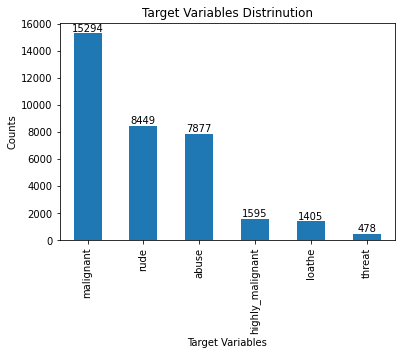

In [124]:
fig, ax = plt.subplots()
df[target_col].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Target Variables Distrinution")
plt.ylabel("Counts")
plt.xlabel("Target Variables")
plt.bar_label(ax.containers[0])
plt.show()

The above bar graph shows the target variable distributions. We can see higher imbalance of the data. But there are some comments which does not have Malignant comments in it. Lets look in to the malignant versus clean comment.

In [125]:
#!pip install wordcloud

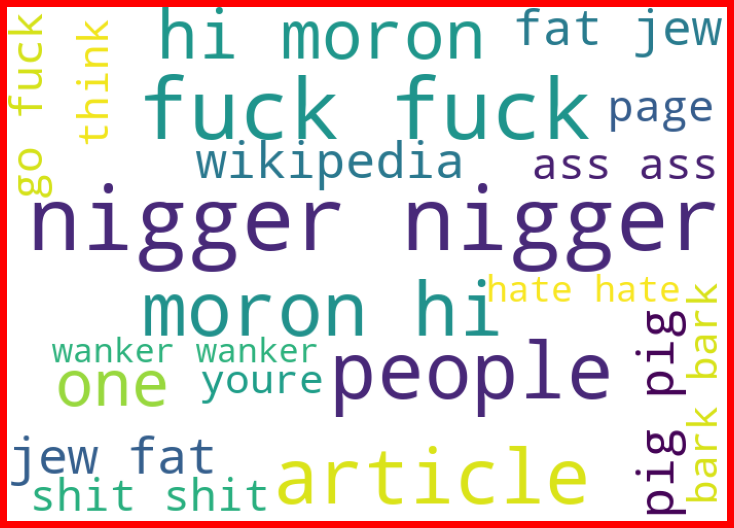

In [126]:
#Getting sense of loud words
from wordcloud import WordCloud


Malignant = df['comment_text'][df['malignant']==1]

Malignant_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Malignant))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(Malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

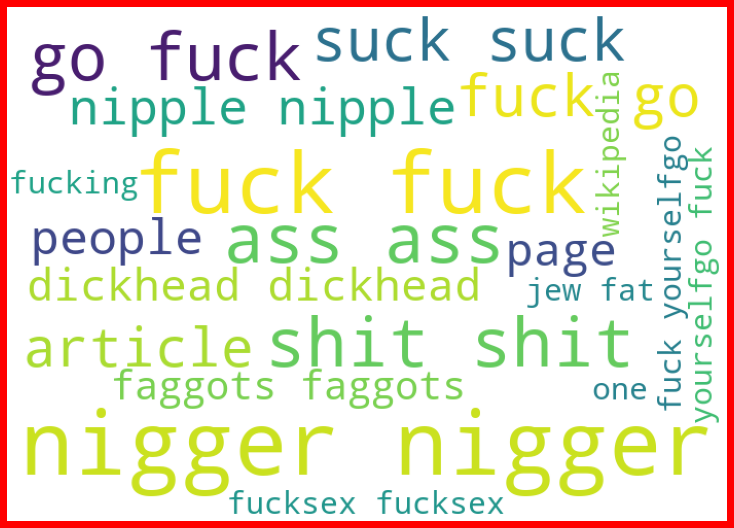

In [127]:
Rude = df['comment_text'][df['rude']==1]

Rude_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Rude))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(Rude_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

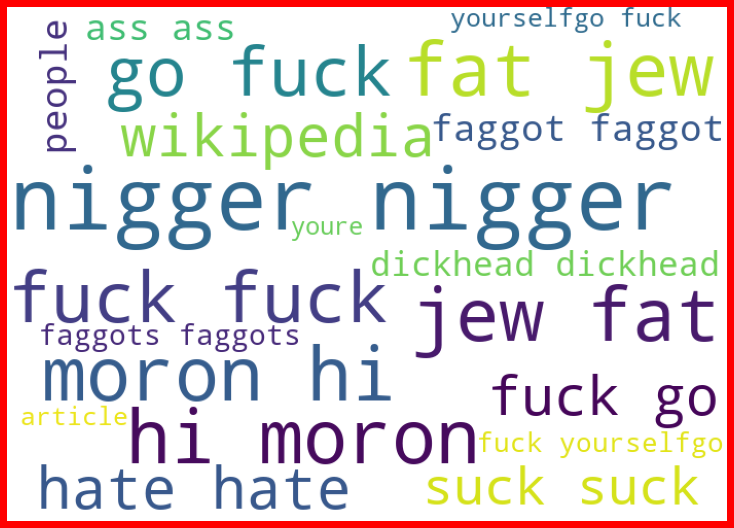

In [128]:
Abuse = df['comment_text'][df['abuse']==1]

Abuse_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Abuse))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(Abuse_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

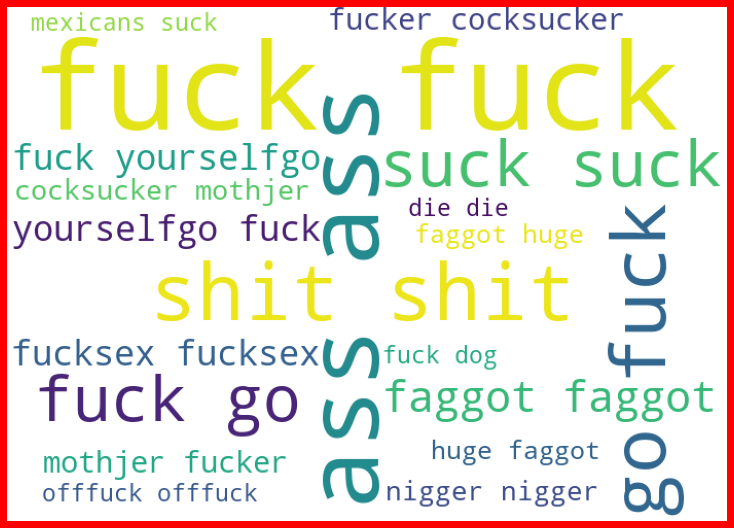

In [129]:
High_Malignant = df['comment_text'][df['highly_malignant']==1]

High_Malignant_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(High_Malignant))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(High_Malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

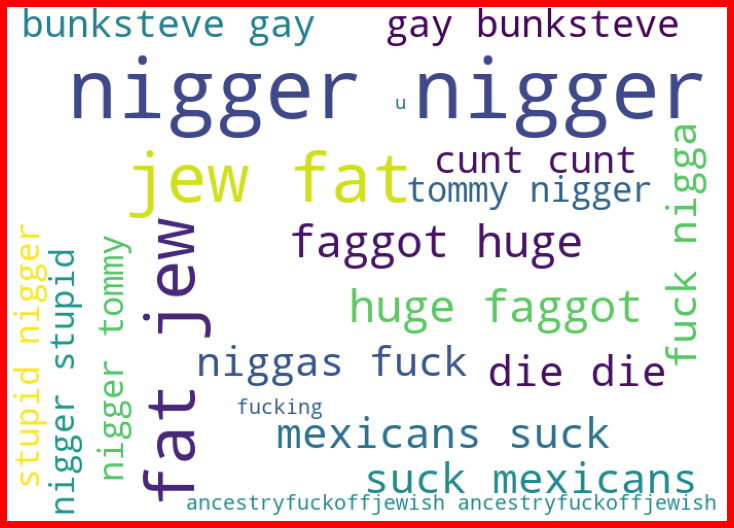

In [130]:
Loathe = df['comment_text'][df['loathe']==1]

Loathe_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Loathe))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(Loathe_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

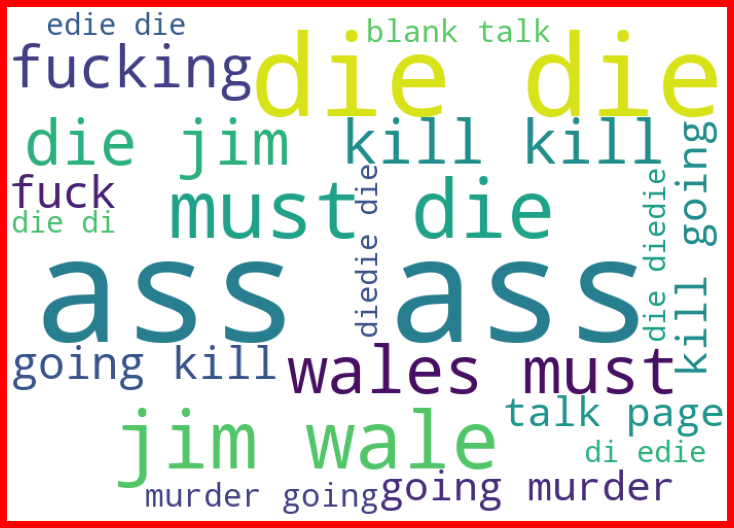

In [131]:
Threat = df['comment_text'][df['threat']==1]

Threat_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(Threat))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(Threat_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [132]:
df_clean=df[df[target_col].sum(axis=1)==0]  #clean comments
df_malignant=df[df[target_col].sum(axis=1)>0] #Malignant comments

len(df_clean), len(df_malignant)

(143346, 16225)

In [133]:
from numpy import array
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import sequential
from keras.layers import Dense, Flatten, Embedding
from keras.layers.convolutional import Conv1D, MaxPooling1D

In [134]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(df['comment_text']))
tokenized_train = tokenizer.texts_to_sequences(df['comment_text'])
tokenized_test = tokenizer.texts_to_sequences(test_df['comment_text'])

In [135]:
tokenized_test[3], len(tokenized_test[3])

([61, 69, 40, 26, 1274, 238, 479, 477, 40, 2482, 1274, 781, 1226, 26, 51, 234],
 16)

In [136]:
tokenized_train[3], len(tokenized_train[3])

([19960,
  102,
  23,
  224,
  1253,
  1880,
  5359,
  43,
  2271,
  372,
  3334,
  1093,
  9030,
  12,
  173,
  19,
  37,
  12593,
  1212,
  1053,
  589,
  315,
  1053,
  231,
  372,
  3232,
  190,
  34,
  4116,
  2143,
  545,
  173,
  28,
  6,
  155,
  394,
  5509,
  17,
  284,
  477,
  19,
  1748,
  3355,
  2874,
  289,
  356,
  479,
  813],
 48)

In [137]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 200
df_train = pad_sequences(tokenized_train, maxlen=maxlen)
df_test = pad_sequences(tokenized_test, maxlen=maxlen)

In [138]:
#Lets check the len of each comment and find the maximum length(maxlen)

total_max_len= [len(comm) for comm in tokenized_train]
max(total_max_len)

1250

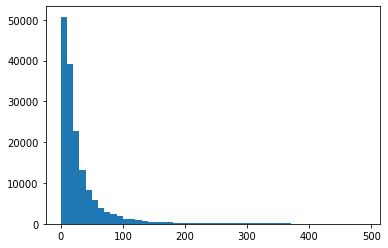

In [139]:
#lets plot the total_max_len to see the len distribution

plt.hist(total_max_len, bins=np.arange(0,500,10)) #considering the len from 0 to 500 in this hist plot
plt.show()

we can see the maxlen above 200 are rare occurence. hence we can continue to use 200 as maxlen

In [140]:
#type(total_max_len), max(total_max_len)

In [141]:
#total_max_len.sort(reverse=True)
#print(total_max_len)

In [142]:
#this is how it looks after padding
df_train[2]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [143]:
Y=df[target_col]
Y=np.asarray(Y)
Y[:10]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [144]:
type(df_train), type(Y)

(numpy.ndarray, numpy.ndarray)

In [145]:
# Split the data set in a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(df_train,Y,test_size=0.2)

In [303]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, Dropout, LSTM, Activation, Input, GlobalMaxPool1D
#from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.models import Model

In [316]:
inp=Input(shape=(maxlen, ))  #maxlen=200 as defined earlier

embed_size=128
x=Embedding(max_features, embed_size)(inp)

x=LSTM(60, return_sequences=True, name='lstm_layer')(x)

x=GlobalMaxPool1D()(x)

#x=Dropout(0.1)(x) #setting the drop out 10%(0.1) of the nodes

#x=Dense(50, activation='relu')(x)

x=Dropout(0.5)(x)

x=Dense(6, activation='sigmoid')(x) #Sigmoid wil squash the output between the bounds 0 and 1

model = Model(inputs=inp, outputs=x)

In [317]:
model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 200)]             0         
_________________________________________________________________
embedding_22 (Embedding)     (None, 200, 128)          2560000   
_________________________________________________________________
lstm_layer (LSTM)            (None, 200, 60)           45360     
_________________________________________________________________
global_max_pooling1d_11 (Glo (None, 60)                0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_89 (Dense)             (None, 6)                 366       
Total params: 2,605,726
Trainable params: 2,605,726
Non-trainable params: 0
________________________________________________

In [318]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [319]:
model.fit(X_train, y_train,
                    batch_size= 32,
                    epochs= 6,
                    validation_split=0.1,
                    verbose=2
                   )

Epoch 1/6
3591/3591 - 344s - loss: 0.3829 - accuracy: 0.4235 - val_loss: 0.3169 - val_accuracy: 0.9783
Epoch 2/6
3591/3591 - 350s - loss: 0.3605 - accuracy: 0.4250 - val_loss: 0.3145 - val_accuracy: 0.9699
Epoch 3/6
3591/3591 - 351s - loss: 0.3567 - accuracy: 0.4258 - val_loss: 0.3184 - val_accuracy: 0.9887
Epoch 4/6
3591/3591 - 356s - loss: 0.3572 - accuracy: 0.4309 - val_loss: 0.3276 - val_accuracy: 0.9861
Epoch 5/6
3591/3591 - 359s - loss: 0.3613 - accuracy: 0.4354 - val_loss: 0.3413 - val_accuracy: 0.9792
Epoch 6/6
3591/3591 - 362s - loss: 0.3681 - accuracy: 0.4439 - val_loss: 0.3467 - val_accuracy: 0.9756


In [326]:
#Evaluate

loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test Accuracy: ', acc*100)

Test Accuracy:  97.46827483177185


In [333]:
loss

0.370788037776947

In [327]:
#Saving the model

from keras.models import load_model

model.save("Malignant_Text_Classifier8.h5")

In [328]:
test_model=load_model("Malignant_Text_Classifier8.h5")

df_Y=test_model.predict(df_test)

In [335]:
df_Y

array([[1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.]], dtype=float32)